hw1
###### import所需要的套件

In [ ]:
import numpy as np ## For numerical python
import struct as st
import matplotlib.pyplot as plt
import time
import math

######Load mnist-training data and test data(in colab,資料從雲端硬碟抓取)





In [ ]:
trainingfilenames = {'images' : '/content/drive/My Drive/Colab Notebooks/MNIST/train-images.idx3-ubyte' ,'labels' : '/content/drive/My Drive/Colab Notebooks/MNIST/train-labels.idx1-ubyte'}
testfilenames = {'images' : '/content/drive/My Drive/Colab Notebooks/MNIST/t10k-images.idx3-ubyte' ,'labels' : '/content/drive/My Drive/Colab Notebooks/MNIST/t10k-labels.idx1-ubyte'}

data_types = {
        0x08: ('ubyte', 'B', 1),  #0x08: unsigned byte
        0x09: ('byte', 'b', 1),   #0x09: signed byte
        0x0B: ('>i2', 'h', 2),   #0x0B: short (2 bytes) 
        0x0C: ('>i4', 'i', 4),   #0x0C: int (4 bytes)
        0x0D: ('>f4', 'f', 4),   #0x0D: float (4 bytes)
        0x0E: ('>f8', 'd', 8)}   #0x0E: double (8 bytes)



######查看training data值

In [ ]:
#..........................................................For training dataset..............................................................
print("Training Dataset.......")
for name in trainingfilenames.keys():
	if name == 'images':
		train_imagesfile = open(trainingfilenames[name],'rb')
	if name == 'labels':
		train_labelsfile = open(trainingfilenames[name],'rb')#,encoding='latin-1')

train_imagesfile.seek(0)
magic = st.unpack('>4B',train_imagesfile.read(4))
if(magic[0] and magic[1])or(magic[2] not in data_types):
	raise ValueError("File Format not correct")
 
#Information(判斷training資料的類型)
nDim = magic[3]#判斷data維度
dataType = data_types[magic[2]][0]#判斷data單位
dataFormat = data_types[magic[2]][1]#判斷data形式
dataSize = data_types[magic[2]][2]#判斷datasize


train_imagesfile.seek(4)
nImg = st.unpack('>I',train_imagesfile.read(4))[0] #num of images/labels
nR = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',train_imagesfile.read(4))[0] #num of columns

train_labelsfile.seek(8) #Since no. of items = no. of images and is already read
print("no. of images :: ",nImg)
print("no. of rows :: ",nR)
print("no. of columns :: ",nC)
#Reading the labels
train_labels_array = np.asarray(st.unpack('>'+dataFormat*nImg,train_labelsfile.read(nImg*dataSize))).reshape((nImg,1))
#Reading the Image data
nBatch = 10000
nIter = int(math.ceil(nImg/nBatch))
nBytes = nBatch*nR*nC*dataSize
nBytesTot = nImg*nR*nC*dataSize
train_images_array = np.array([])
for i in range(0,nIter):
	#try:
	temp_images_array = np.asarray(st.unpack('>'+dataFormat*nBytes,train_imagesfile.read(nBytes))).reshape((nBatch,nR,nC))
	#except:
	#	nbytes = nBytesTot - (nIter-1)*nBytes
	#	temp_images_array = 255 - np.asarray(st.unpack('>'+'B'*nbytes,train_imagesfile.read(nbytes))).reshape((nBatch,nR,nC))'''
	#Stacking each nBatch block to form a larger block
	if train_images_array.size == 0:
		train_images_array = temp_images_array
	else:
		train_images_array = np.vstack((train_images_array,temp_images_array))
	temp_images_array = np.array([])


print("Training Set Labels shape ::",train_labels_array.shape)
print("Training Set Images shape ::",train_images_array.shape)



Training Dataset.......
no. of images ::  60000
no. of rows ::  28
no. of columns ::  28
Training Set Labels shape :: (60000, 1)
Training Set Images shape :: (60000, 28, 28)


######查看test data資訊

In [ ]:
#..........................................................For test dataset..................................................................
print("Test Dataset.......")
stime = time.time()
for name in testfilenames.keys():
	if name == 'images':
		test_imagesfile = open(testfilenames[name],'rb')
	if name == 'labels':
		test_labelsfile = open(testfilenames[name],'rb')
test_imagesfile.seek(0)
magic = st.unpack('>4B',test_imagesfile.read(4))
if(magic[0] and magic[1])or(magic[2] not in data_types):
	raise ValueError("File Format not correct")

#Information(判斷training資料的類型)
nDim = magic[3]#判斷data維度
dataType = data_types[magic[2]][0]#判斷data單位
dataFormat = data_types[magic[2]][1]#判斷data形式
dataSize = data_types[magic[2]][2]#判斷datasize


test_imagesfile.seek(4)
nImg = st.unpack('>I',test_imagesfile.read(4))[0] #num of images/labels
nR = st.unpack('>I',test_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',test_imagesfile.read(4))[0] #num of columns

test_labelsfile.seek(8) #Since no. of items = no. of images and is already read
print("no. of images :: ",nImg)
print("no. of rows :: ",nR)
print("no. of columns :: ",nC)
#Test set
#Reading the labels
test_labels_array = np.asarray(st.unpack('>'+dataFormat*nImg,test_labelsfile.read(nImg*dataSize))).reshape((nImg,1))
#Reading the Image data
nBatch = 10000
nIter = int(math.ceil(nImg/nBatch))
nBytes = nBatch*nR*nC*dataSize
nBytesTot = nImg*nR*nC*dataSize
test_images_array = np.array([])
for i in range(0,nIter):
	#try:
	temp_images_array = np.asarray(st.unpack('>'+dataFormat*nBytes,test_imagesfile.read(nBytes))).reshape((nBatch,nR,nC))
	'''except:
		nbytes = nBytesTot - (nIter-1)*nBytes
		temp_images_array = 255 - np.asarray(st.unpack('>'+'B'*nbytes,test_imagesfile.read(nbytes))).reshape((nBatch,nR,nC))'''
	#Stacking each nBatch block to form a larger block
	if test_images_array.size == 0:
		test_images_array = temp_images_array
	else:
		test_images_array = np.vstack((test_images_array,temp_images_array))
	temp_images_array = np.array([])

print("Test Set Labels shape ::",test_labels_array.shape)
print("Test Set Image shape ::",test_images_array.shape)



Test Dataset.......
no. of images ::  10000
no. of rows ::  28
no. of columns ::  28
Test Set Labels shape :: (10000, 1)
Test Set Image shape :: (10000, 28, 28)


#####Implementation1
######將original data 分隔成 validation data and training data(3:7)

In [ ]:
def shuffle_split_data(image,label,flatten=False):#分割image和label的函式(共6萬筆) train:validation=7:3

    
    #noramalize x
    X_image=image.astype(float)/255.
    
    

    # we reserve the last 18000 training examples for validation
    X_train, X_validation = X_image[:-18000], X_image[-18000:] 
    y_train, y_validation = label[:-18000], label[-18000:]

    if flatten:
      X_train = X_train.reshape([X_train.shape[0], -1])
      X_validation = X_validation.reshape([X_validation.shape[0], -1])
      

    print("Image:")
    print(len(X_train),len(X_validation))
    print("label:")
    print(len(y_train),len(y_validation))
    return X_train,X_validation,y_train,y_validation

In [ ]:
def test_data(image,label,flatten=False):#test資料處理

    
    #noramalize x
    image_test=image.astype(float)/255.
    if flatten:
      X_test = image_test.reshape([image_test.shape[0], -1])
           
    return X_test,label

Image:
42000 18000
label:
42000 18000


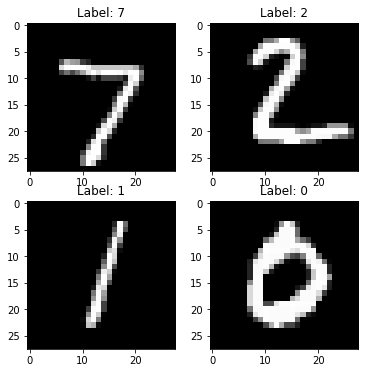

In [ ]:
image_resize=np.reshape(train_images_array,(60000,-1))
label_resize=np.reshape(train_labels_array,60000)
image_train,image_validation,label_train,label_validation,=shuffle_split_data(image_resize,label_resize,flatten=True)
image_test_resize=np.reshape(test_images_array,(10000,-1))
label_test_resize=np.reshape(test_labels_array,10000)
image_test,label_test=test_data(image_test_resize,label_test_resize,flatten=True)
plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%label_test[i])
    plt.imshow(image_test[i].reshape([28,28]),cmap='gray')


#####Create main class layer do forward and backward(fundamental)

In [ ]:
from __future__ import print_function
np.random.seed(100)#使每次隨機數相同

#####Implementation2
######Dense neural layer:f(x)=W*X+b(>)
*   X is an object-feature matrix of shape [batch_size, num_features]
*   W is a weight matrix [num_features, num_outputs]
*  b is a vector of num_outputs biases









In [ ]:
class Layer:
        # A dummy layer does nothing
        #A building block. Each layer is capable of performing two things:
        #- Process input to get output:           output = layer.forward(input)
        # - Propagate gradients through itself:    grad_input = layer.backward(input, grad_output)
  def __init__(self):

        #initialize layer parameters (if any) and auxiliary stuff.
        
        
     pass
    
  def forward(self, input):
       
        #Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        # A dummy layer just returns whatever it gets as input.
     return input
        #Performs a backpropagation step through the layer, with respect to the given input.
        #To compute loss gradients w.r.t input, we need to apply chain rule (backprop):
        #d loss / d x  = (d loss / d layer) * (d layer / d x)
        # we already receive d loss / d layer as input, so only need to multiply it by d layer / d x.
        # If our layer has parameters (e.g. dense layer), we also need to update them here using d loss / d layer
  def backward(self, input, grad_output):
               
                # The gradient of a dummy layer is precisely grad_output, write it more explicitly

     num_units = input.shape[1]
        
     d_layer_d_input = np.eye(num_units)
        
     return np.dot(grad_output, d_layer_d_input) # chain rule

In [ ]:
class Dense(Layer):
  #A dense layer is a layer which performs a learned affine transformation:f(x) = <W*x> + b
  def __init__(self, input_units, output_units, learning_rate=0.001):
    self.learning_rate = learning_rate
    self.weights = np.random.normal(loc=0.0,scale = np.sqrt(2/(input_units+output_units)),size = (input_units,output_units))#對權重進行標準化,初始權重平均數為0,標準差為2/(number of inputs + number of outputs)
    self.biases = np.zeros(output_units)
  #Perform an affine transformation:f(x) = <W*x> + b
  #    input shape: [batch, input_units]
  #    output shape: [batch, output units]
  def forward(self,input):  
     return np.dot(input,self.weights) + self.biases
  #Perform an affine transformation:f(x) = <W*x> + b 
  #input shape: [batch, input_units]
  #output shape: [batch, output units]  
  def backward(self,input,grad_output):
    grad_input = np.dot(grad_output, self.weights.T)
  # compute df / dx = df / d-dense * d-dense / dx,d-dense/dx=weights transposed  
    grad_weights = np.dot(input.T, grad_output)
    grad_biases = grad_output.mean(axis=0)*input.shape[0]
  # compute gradient w.r.t. weights and biases(進行梯度處理)
    assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
  #perform a stochastic gradient descent step
    self.weights = self.weights - self.learning_rate * grad_weights
    self.biases = self.biases - self.learning_rate * grad_biases

    return grad_input



#####Implementation3
######ReLu layer:Nonlinearity,根據Maxout進行輸出

In [ ]:
class ReLU(Layer):
  def __init__(self):#ReLU layer simply applies elementwise rectified linear unit to all inputs
    pass 
  def forward(self,input):#Apply elementwise ReLU to [batch, input_units] matrix
    relu_forward=np.maximum(0,input)
    return relu_forward
  def backward(self, input, grad_output):#Compute gradient of loss w.r.t. ReLU input
    relu_grad=input>0
    return grad_output*relu_grad
  

#####Implementation4
######Softmax output(outputs the probability of a sample)

In [ ]:
def softmax(logits):
   X=np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
   return X

#####Implementation5
######Cross-entropy loss calculation(output of a batch of data and their labels to calculate the CE loss.)

In [ ]:
def crossentropy_with_logits(logits,reference_answers):
    #Compute crossentropy from logits[batch,n_classes] and ids of correct answers
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    loss = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return loss
def grad_crossentropy_with_logits(logits,reference_answers):
    #Compute crossentropy gradient from logits[batch,n_classes] and ids of correct answers
    ones_for_answers = np.zeros_like(logits)#統一將logit變為相同型式0陣列
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax1=softmax(logits)#softmax函式,按行相加，並且保持二維特性
    loss_grad=(- ones_for_answers + softmax1) / logits.shape[0]
    return loss_grad

######將Dense和ReLu層合併至network

In [ ]:
network = []
network.append(Dense(image_train.shape[1],256))
network.append(ReLU())
network.append(Dense(256,128))
network.append(ReLU())
network.append(Dense(128,10))

#####Implementation6
#####-Feed forward
#####-Backward propagation:Propagate the error backwards and update each parameter

In [ ]:
def forward(network, X):
   
    #Compute activations of all network layers by applying them .Return a list of activations for each layer.     
    activations = []
    input = X
    # 每層的迴圈
    for l in network:
        activations.append(l.forward(input))
        
        #更新input到上一層的output
        input = activations[-1]    
    assert len(activations) == len(network)
    return activations

def predict(network,X): #Compute network predictions. Returning indices of largest Logit probability
    
    logits = forward(network,X)[-1]
    return logits.argmax(axis=-1)

def loss_calculate(network,X,Y): #Compute loss
    
    logits = forward(network,X)[-1]
    loss = crossentropy_with_logits(logits,Y)
    return loss
   

def train(network,X,y):
    
    #Train our network on a given batch of X and y.
    #Need to run forward to get all layer activations.
    #Run layer.backward going from last to first layer.
    #After called backward for all layers, all Dense layers have already made one gradient step.
      
    # Get the layer activations
    layer_activations = forward(network,X)    
    layer_inputs = [X]+layer_activations  #layer_input[i] is an input for network[i]
    logits = layer_activations[-1]
    
    # Compute the loss and the initial gradient
    loss = crossentropy_with_logits(logits,y)
    loss_grad = grad_crossentropy_with_logits(logits,y)
    
    # Propagate gradients through the network,and do the "backpropagation" process
    for layer_index in range(len(network))[::-1]:
        layer = network[layer_index]
        loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
        
    return np.mean(loss)

  

In [ ]:
from tqdm import trange#minibatch函式,批次執行輸入資料,並透過shuffle打亂資料排序
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [ ]:
from IPython.display import clear_output
train_log = []
val_log = []
test_log=[]
train_loss_log=[]
val_loss_log=[]

#####train and validation data的accuracy對照圖
#####train and validation data的loss對照圖

Epoch 79
Train accuracy: 0.9616904761904762
Val accuracy: 0.9538888888888889


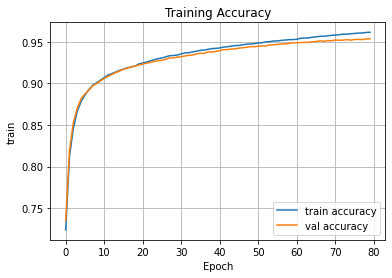

Epoch 79
Train Loss: 0.13495464393747802
Validation Loss: 0.16060270797532153


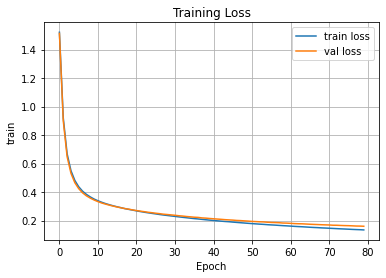

Test accuracy 0.9559


In [ ]:
for epoch in range(80):

    for x_batch,y_batch in iterate_minibatches(image_train,label_train,batchsize=32,shuffle=True):
        train(network,x_batch,y_batch)
        
    train_log.append(np.mean(predict(network,image_train)==label_train))
    val_log.append(np.mean(predict(network,image_validation)==label_validation))
    train_loss_log.append(np.mean(loss_calculate(network,image_train,label_train)))
    val_loss_log.append(np.mean(loss_calculate(network,image_validation,label_validation)))

    
    clear_output()
#plot training accuracy and validation accuracy   
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    
    
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.title("Training Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("train")
    plt.grid()
    plt.show()
#plot training loss and validation loss 
    print("Epoch",epoch)
    print("Train Loss:",train_loss_log[-1])
    plt.plot(train_loss_log,label='train loss')
    print("Validation Loss:",val_loss_log[-1])
    plt.plot(val_loss_log,label='val loss')
    plt.legend(loc='best')
    plt.title("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("train")
    plt.grid()
    plt.show()


test_log.append(np.mean(predict(network,image_test)==label_test))
print("Test accuracy",test_log[-1])